In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
dropping = ['lips_Movements',
'eye_Symmetry',
'eyebrow_Size',
'eyelash_Size',
'face_Size',
'forehead_Breadth',
'forehead_Length',
'hair_Nature',
'hands_Length',
'joint_Size',
'leg_Length',
'lip_Size',
'lips_Color',
'nails_Length',
'shoulder_Breadth',
'skin_Nature',
'bladder_Amount',
'bladder_Frequency',
'teeth_Size',
'bodytemp_Amount',
'bowel_Tendency',
'dreams_Amount',
'like_Astringent',
'like_Pungent',
'like_Warm',
'perspiration_Amount',
'suit_Oily',
'suit_Pungent',
'weight_Changes',
'eyebrows_Movements',
'eyes_Movements',
'hands_Movements',
'head_Movements',
'jaw_Movements',
'legs_Movements',
'shoulder_Movements',
'speaking_Amount',
'tongue_Movements',
'walking_steps',
'walking_style',
'working_Quality',
'working_Speed',
'working_style',
'achievingEnds_quality',
'Anger_Speed',
'execution_quality',
'faith_quality',
'forgiveness_quality',
'generosity_quality',
'initiation_speed',
'Irritability_speed',
'makingFriends_speed',
'memory_auditory',
'memory_gustatory',
'memory_olfactory',
'memory_tactile',
'memory_visual',
'planning_quality',
'recalling_speed',
'retaining_quality',
'retainingFriends_quality',
'hair_feel',
'hair_Nature1',
'hair_Nature2',
'healthproblem_in_temp',
'lips_Nature2',
'lips_Nature5',
'lips_Nature6',
'nails_Nature2',
'nails_Nature5',
'palms_Nature2',
'palms_Nature5',
'palms_Nature6',
'soles_Nature2',
'soles_Nature5',
'soles_Nature6',
'speech_Argumentative',
'speech_AvoidConfrontations',
'speech_Convincing',
'speech_Deviated','speech_Irrelevant','teeth_Appearance1','teeth_Appearance2']

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# Load the dataset
data = pd.read_csv('data.csv')
data = data.dropna()
# Drop the 'SampleIdx' column
data = data.drop(columns=['SampleIdx'])
data = data.drop(columns = dropping)
# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['class'])
y = data['class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply correlation matrix and drop columns with correlation > 0.95
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

# Initialize the CatBoostClassifier for multi-class classification
clf = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=0)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
con = confusion_matrix(y_test,y_pred)

<ipython-input-3-4d2d04a40a29>:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Accuracy: 0.96875


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('data.csv')
data = data.drop(columns=['SampleIdx'])
data = data.dropna()
data = data.drop(columns = dropping)
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    original_labels = data[col]
    le = LabelEncoder()
    encoded_labels = le.fit_transform(original_labels)
    label_mapping = {original: encoded for original, encoded in zip(original_labels, encoded_labels)}
    label_encoders[col] = label_mapping

print(label_encoders)


{'Gender': {'Male': 1, 'Female': 0}, 'bodyBuild_Size': {'Weaklydeveloped': 1, 'Welldeveloped': 2, 'Moderatelydeveloped': 0}, 'bodyFrame_Breadth': {'Thin/Narrow': 2, 'Broad': 0, 'Medium': 1}, 'bodyFrame_Length': {'Long': 0, 'Medium': 1, 'Tooshort/Toolong': 2}, 'bodyHair_Color': {'Black': 0, 'DarkBrown': 1, 'Dusky': 2, 'LightBrown': 3}, 'chest_Breadth': {'Thin/Narrow': 2, 'Broad': 0, 'Medium': 1}, 'eye_Color': {'DarkBrown': 1, 'LightBrown': 3, 'Black': 0, 'Grayish': 2}, 'eye_Size': {'Moderatelydeveloped': 0, 'Weaklydeveloped': 1, 'Welldeveloped': 2}, 'hair_Growth': {'Moderate': 1, 'Scanty': 2, 'Dense': 0}, 'hair_Type': {'Thin': 1, 'Thick': 0}, 'nails_color': {'Pink': 1, 'Reddish': 2, 'PaleYellow': 0}, 'palate_Color': {'Pink': 1, 'Reddish': 2, 'PaleYellow': 0}, 'palms_Color': {'PaleYellow': 1, 'Reddish': 3, 'Pink': 2, 'Dark': 0}, 'scalpHair_Color': {'LightBrown': 3, 'Black': 0, 'DarkBrown': 1, 'Dusky': 2}, 'skin_Color': {'Whitish': 4, 'FairPaleYellow': 1, 'Dark': 0, 'FairReddish': 3, 'Fai

In [ ]:
for col, label_mapping in label_encoders.items():
    print(f"Column: {col}")
    for original_label, encoded_label in label_mapping.items():
        print(f"  {original_label} => {encoded_label}")

Column: Gender
  Male => 1
  Female => 0
Column: bodyBuild_Size
  Weaklydeveloped => 1
  Welldeveloped => 2
  Moderatelydeveloped => 0
Column: bodyFrame_Breadth
  Thin/Narrow => 2
  Broad => 0
  Medium => 1
Column: bodyFrame_Length
  Long => 0
  Medium => 1
  Tooshort/Toolong => 2
Column: bodyHair_Color
  Black => 0
  DarkBrown => 1
  Dusky => 2
  LightBrown => 3
Column: chest_Breadth
  Thin/Narrow => 2
  Broad => 0
  Medium => 1
Column: eye_Color
  DarkBrown => 1
  LightBrown => 3
  Black => 0
  Grayish => 2
Column: eye_Size
  Moderatelydeveloped => 0
  Weaklydeveloped => 1
  Welldeveloped => 2
Column: hair_Growth
  Moderate => 1
  Scanty => 2
  Dense => 0
Column: hair_Type
  Thin => 1
  Thick => 0
Column: nails_color
  Pink => 1
  Reddish => 2
  PaleYellow => 0
Column: palate_Color
  Pink => 1
  Reddish => 2
  PaleYellow => 0
Column: palms_Color
  PaleYellow => 1
  Reddish => 3
  Pink => 2
  Dark => 0
Column: scalpHair_Color
  LightBrown => 3
  Black => 0
  DarkBrown => 1
  Dusky => 

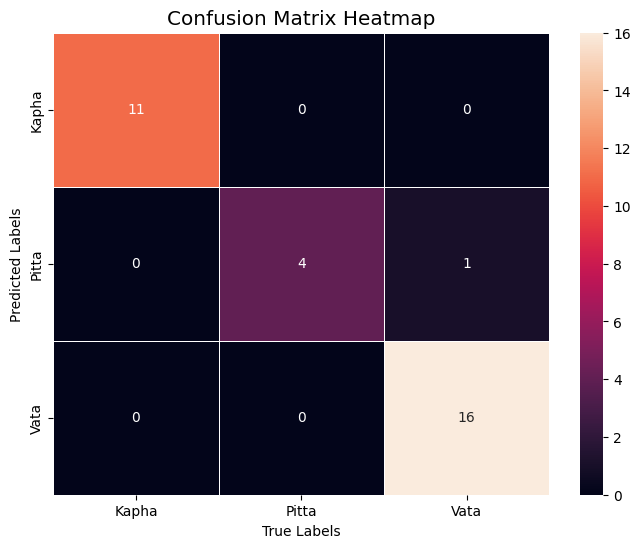

Accuracy: 0.96875


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['Kapha', 'Pitta', 'Vata']

plt.figure(figsize=(8,6))
sns.heatmap(con, annot=True, fmt="d", linewidths=0.5, xticklabels=class_labels, yticklabels=class_labels, cbar=True)
sns.set(font_scale=1.2)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()
print("Accuracy:", accuracy)

In [ ]:
for i in X_test.columns:
  print(i)

Gender
bodyBuild_Size
bodyFrame_Breadth
bodyFrame_Length
bodyHair_Color
chest_Breadth
eye_Color
eye_Size
hair_Growth
hair_Type
nails_color
palate_Color
palms_Color
scalpHair_Color
skin_Color
skin_Type
soles_Color
teeth_Color
teeth_Shape
teeth_Shape_Even
appetite_Amount
appetite_Frequency
body_Odour
bowel_Freq
digestive_Amount
like_Bitter
like_Salty
like_Sour
like_Sweet
sleep_Amount
sleep_Quality
stool_Consistency
speaking_Speed
walking_Amount
walking_Speed
healing_Power
mental_Power
physical_Power
resistance_Power
Anger_Quality
forgetfulness_speed
memorizing_speed
hair_Nature3
voice_clear
skin_cracked
skin_freckle
skin_mark
skin_mole
skin_pimple
skin_wrinkled


In [ ]:
print(X_train.shape)
p=X_test.iloc[5]

(74, 50)


In [ ]:
for i in X_train.columns:
  print(X_train[i])

14     1
72     0
133    0
37     1
52     1
      ..
96     0
21     1
130    0
69     1
143    0
Name: Gender, Length: 74, dtype: int64
14     2
72     0
133    2
37     2
52     1
      ..
96     1
21     0
130    1
69     0
143    1
Name: bodyBuild_Size, Length: 74, dtype: int64
14     0
72     1
133    0
37     0
52     2
      ..
96     2
21     1
130    2
69     2
143    2
Name: bodyFrame_Breadth, Length: 74, dtype: int64
14     0
72     1
133    1
37     1
52     2
      ..
96     1
21     1
130    2
69     1
143    1
Name: bodyFrame_Length, Length: 74, dtype: int64
14     0
72     0
133    3
37     0
52     3
      ..
96     3
21     3
130    3
69     1
143    3
Name: bodyHair_Color, Length: 74, dtype: int64
14     0
72     1
133    0
37     0
52     2
      ..
96     2
21     1
130    2
69     2
143    1
Name: chest_Breadth, Length: 74, dtype: int64
14     0
72     0
133    1
37     1
52     3
      ..
96     1
21     3
130    3
69     1
143    3
Name: eye_Color, Length: 74, 

In [ ]:
print(clf.predict([p]))
print(y_test.iloc[5])

[[1]]
1
